In [2]:
#dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
#create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
#reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
#view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
#save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [10]:
# Create alink from Python to the database
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
#query to retrieve the most recent date in the data set
date= session.query(measurement.date).order_by(measurement.date.desc()).first()
#display
date

('2017-08-23',)

In [14]:
#query to retrieve the most recent date in the data set using pandas
d=pd.read_sql('SELECT max(date) as Latest_date FROM measurement', con=engine)
#display
['Latest_date']

0    2017-08-23
Name: Latest_date, dtype: object

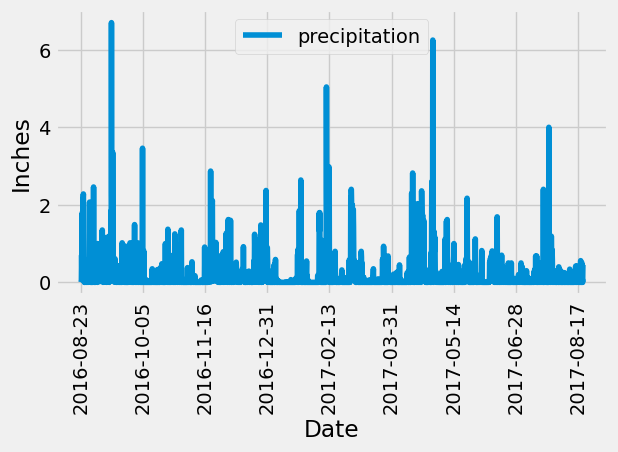

In [30]:
#design a query to retrieve the last 12 months of precipitation data and plot the results, starting from the most recent data point in the database. 

#calculate the date one year from the last date in data set.
lasty = dt.date(2017, 8, 23)-dt.timedelta(days=365)

#query to retrieve the data and precipitation scores
dp = session.query(measurement.date, measurement.prcp).filter(measurement.date>=lasty).all()

#save the query results as a Pandas DataFrame and set the column names
rst= pd.DataFrame(dp, columns =["date", "precipitation"])

#clean th dataframe from null values
rst1=rst.dropna()

#sort the dataframe by date
rt=rst1.sort_values('date')

#set the index of the DataFrame to the 'date' column
rt.set_index(rt["date"], inplace = True)

#plot the data
rt.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:
#calculate the summary statistics for the precipitation data by using Pandas
rt.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
#query to calculate the total number of stations in the dataset
nbr_s=session.query(func.count(station.station)).all()

#display
nbr_s

[(9,)]

In [22]:
#query to find the most active stations by listing the stations and their counts in descending order.
st = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
        
#display
st

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
#calculate the lowest, highest, and average temperature using the most active station id from the previous query
#query to find the station with the highest number of observations
st1= session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()
s=st1[0]

#query to calculate the lowest, highest, and average temperature for the most active station
active_session_info = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == s).all()
    
#display
active_session_info 



[(54.0, 85.0, 71.66378066378067)]

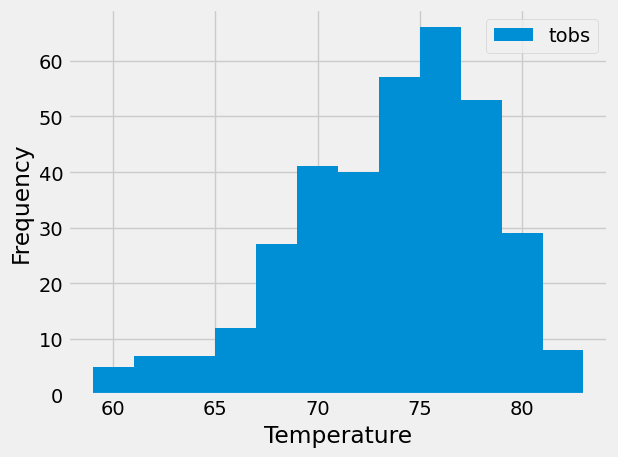

In [20]:
#query the last 12 months of temperature observation data for the most active station
tp = session.query(measurement.tobs).filter(measurement.station == s).\
    filter(measurement.date >= lasty).all()
    
#create a Pandas DataFrame from the query results
tpd= pd.DataFrame(tp, columns = ["tobs"])

#plot a histogram of the Tobs
tpd = pd.DataFrame(tp, columns=["tobs"])
tpd.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency") 
plt.grid(True)
plt.tight_layout()

# Close Session

In [19]:
#close Session
session.close()